# Visualization of evaluation metrics

In this notebook we aim to understand the variation in evaluation metrics with respect to a parameter while training a particular Machine Learning Algorithm. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from itertools import cycle
import time

import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,precision_score, average_precision_score, f1_score, accuracy_score, recall_score
from scipy import interp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Load and prepare the data

I'll be using the ```vehicles.csv``` dataset. We load it using pandas.

In [2]:
path = '../../datasets/vehicles.csv'  # Path to dataset
df = pd.read_csv(path)

Let us now seperate the dependent feature and indepenent features. Here, Class is the dependent feature.

In [3]:
X = df.drop(labels='Class', axis=1)  # Drop the target attribute from the X variable
# We are not normalising the data for this particular notebook.
y = df.Class  # The target attribute to be predicted

We will now split data into random train and test subsets.

In [4]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Tables and figures

Now we aim to create a table which will be used to store the changing value of the hyperparameter of the classifier against various evaluation metrics.

We have used K nearest neighbour algorithm here beacuse it is:
1. Easy to interpret 
2. Takes less Calculation time
3. Good predictive power
4. Has just one main hyperparameter

K nearest neighbour has a parameter "n-neighbors" and I decided to vary this parameter because it influences the algorithm by a large extent and therefore it would be interesting to see its effect on various evaluation metrics.

In [5]:
columns = [
    "n-neighbors",
    "Accuracy",
    "Recall Score Macro",
    "Precision",
    "f1 Score Macro",
]

table= pd.DataFrame(columns=columns)

Let us now vary the value of the parameter 'n-neighbors' from 1 to 9 and store the corresponding values of the evaluation metric in a table. 

In [6]:
# It makes more sense to create a dict for each row, keep appending them to a list
# and finally convert them into a dataframe
for n in range (1,10):
    clf = neighbors.KNeighborsClassifier(n_neighbors= n)
    clf.fit(train_X,train_y)
    pred_y = clf.predict(test_X)
    table.loc[n, "n-neighbors"] = n
    table.loc[n, "Recall Score Macro"] = recall_score(test_y, pred_y, average='macro')
    table.loc[n, "f1 Score Macro"] = f1_score(test_y, pred_y, average='macro')
    table.loc[n, "Accuracy"] = clf.score(test_X, test_y)
    table.loc[n, "Precision"] = precision_score(test_y, pred_y, average='macro')
    
table

,n-neighbors,Accuracy,Recall Score Macro,Precision,f1 Score Macro
1,1,0.652941,0.654897,0.660981,0.657313
2,2,0.623529,0.625514,0.654255,0.625295
3,3,0.694118,0.696861,0.698791,0.697444
4,4,0.7,0.703653,0.708982,0.705359
5,5,0.670588,0.671943,0.671685,0.669072
6,6,0.688235,0.690639,0.690089,0.690243
7,7,0.688235,0.691234,0.678895,0.684067
8,8,0.652941,0.656034,0.647905,0.651597
9,9,0.670588,0.672024,0.644996,0.652301


We define a simple function to draw a graph with the given metric.

In [7]:
def plot_graph(para):
    tr = table["n-neighbors"]
    ts = table[para]
    plt.plot(tr, ts)
    plt.xlabel('n-neighors')
    plt.ylabel(para)
    plt.show()

## Accuracy

We are studying the effect on "accuracy" because it gives a good idea on how well the model fits on the test set with change in the value of n-neighbours.

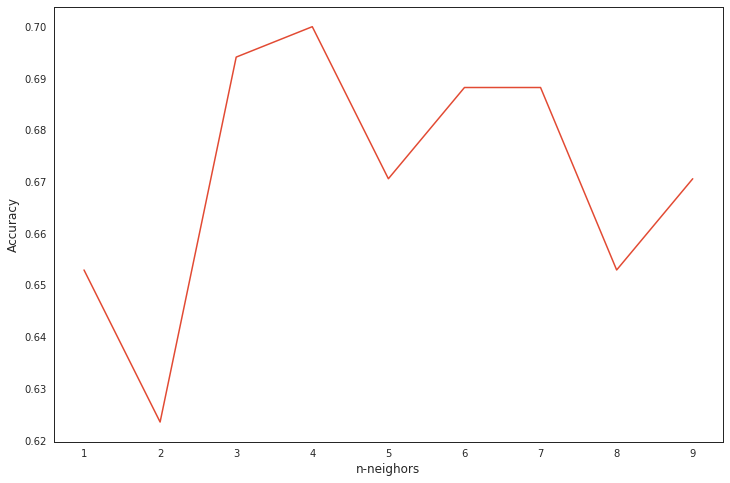

In [8]:
plot_graph("Accuracy")    

## Recall score

Let us now see how Recall Score macro varies with change in n-neighbour. We want to visualise this because it answers the following question:

What proportion of actual Positives is correctly classified? 

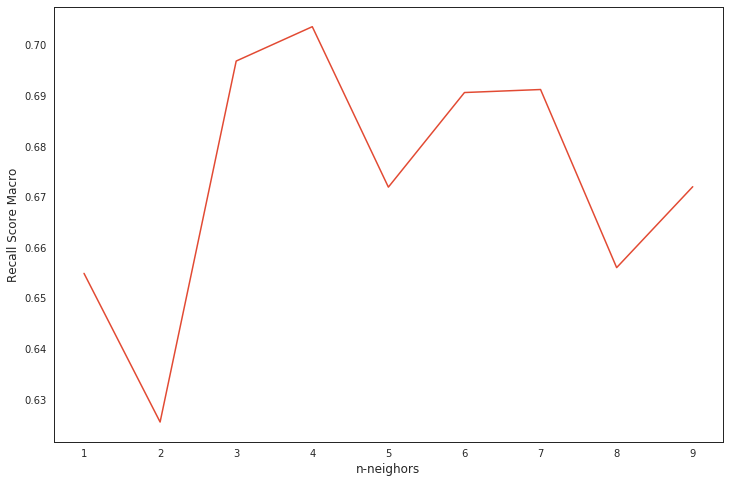

In [9]:
plot_graph("Recall Score Macro")

## f1 score 

Now, let us study the variation in f1 Score macro. F1 score sort of maintains a balance between the precision and recall (as it is the harmonic mean between the two) for a given classifier. So if the precision is low, the F1 is low and if the recall is low again then also the F1 score is low and vice-versa. It can hence be interpreted as a weighted average of the precision and recall.

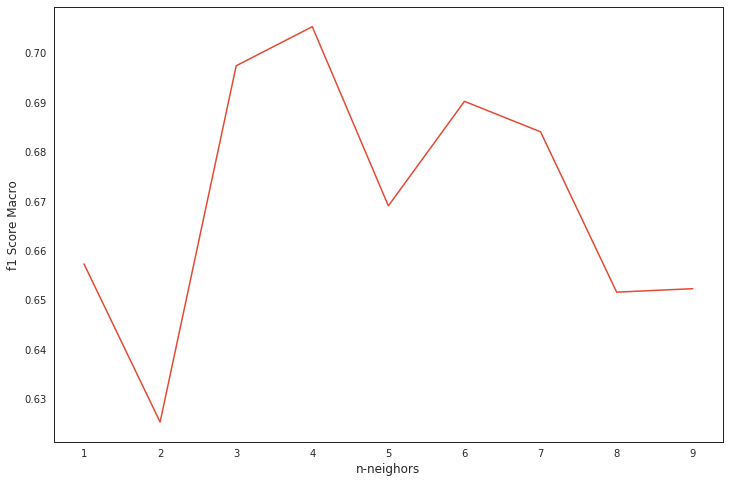

In [10]:
plot_graph("f1 Score Macro")

## Precision

Let us now take a look at the variation of precision. Precision tells us how relevant are the positive detections. Higher the precision better is our mechanism. It is the ability of the classifier not to label as positive a sample that is negative (yes, that's the subtle difference between precision and recall).

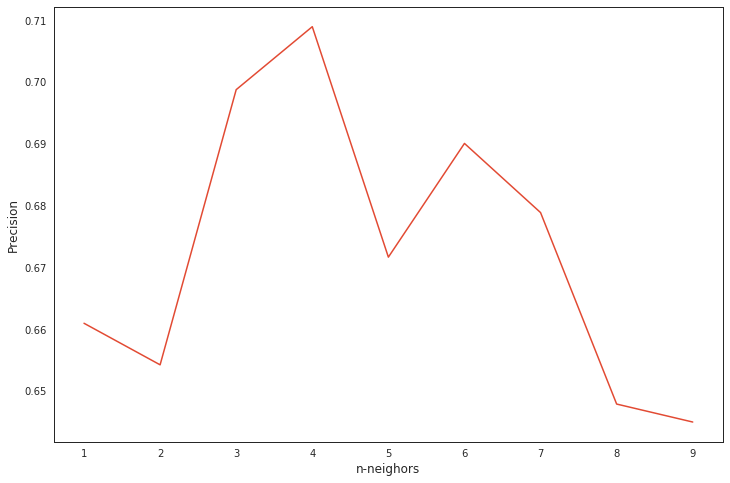

In [11]:
plot_graph("Precision")

## Observations

Through this notebook I got a better idea on how to select the *n-neighbours* hyperparameter for the K nearest neighbour classifier. Here are some of the observations:
1. All the metrics share similar characteristics showing that n_neighbors=4 gives the best score while n_neighbors=5 gives the worst score
2. f1 score macro shows a similar behaviour as the recall score macro. Here we have taken average="macro" because we wanted to study the unweighted mean.
3. When *n_neighbors* changes from 6 to 7, it produces a difference in trend among the metrics. The recall remains the same (or rather increases slightly) while the precision drops sharply. 

## Conclusion

Making decisions about setting hyperparameters cannot be done by seeing the values of a single performance metric only. The aim of the model is to optimize the performance of the classifier and therefore the value of n-neighbors should be set such that it gives satisfactory values for all the evaluation metrics.

I admit this notebook has been a half-hearted effort but that is because most of the interesting things regarding hyper-parameter tuning has already been done in the notebook addressing the second issue :)

## Further things to be done

I'd like to further explore this issue by:
1. Extending this to different machine learning algorithms, that will help us understand how much influence a particular hyperparameter has on the algorithm (but most of this is actually done in another notebook).
2. Changing more than one hyperparameter in a particular classifier and then studying the evaluation metrics on the combination.